# Building A Handwritten Digits Classifier

Deep neural networks have been used to reach state-of-the-art performance on image classification.

First hidden layer the network learned to represent edges and specific features of faces. In the second hidden layer, the weights seemed to represent higher level facial features like eyes and noses. Finally, the weights in the last hidden layer resemble faces that could be matched against. Each successive layer uses weights from previous layers to try to learn more complex representations.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline
digits_data = load_digits()

In [2]:
# plt.gray() 
# for i in range(10):
#     plt.matshow(digits_data.images[i]) 
#     plt.show() 

In [3]:
digits_data.keys()
labels = pd.Series(digits_data['target'])
data = pd.DataFrame(digits_data["data"])


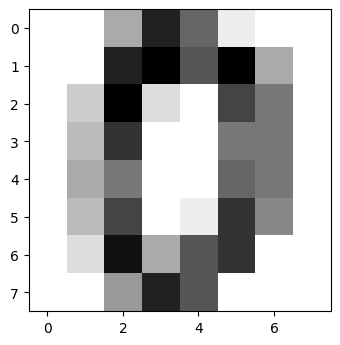

In [4]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

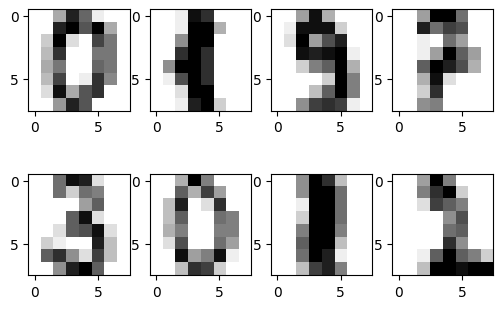

In [5]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
def train(k,train_features,train_labels):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_features,train_labels)
    return knn


In [7]:
def test(model,test_features,test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df["correct_labels"] = test_labels
    train_test_df["predicted_labels"] = predictions
    accuracy = sum(train_test_df["correct_labels"]==train_test_df["predicted_labels"])/len(train_test_df)
    return accuracy


In [8]:
def cross_validate(k):
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    accuracies = [ ]
    for train_index, test_index in kf.split(data):
        train_features,test_features = data.loc[train_index],data.loc[test_index]
        train_labels,test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(k,train_features,train_labels)
        accura = test(model,test_features,test_labels)
        accuracies.append(accura)
    return accuracies

{1: 0.9888728037614452, 2: 0.9821912892848305, 3: 0.9872011878247959, 4: 0.9833073496659243, 5: 0.9849777282850779, 6: 0.9827517941103686, 7: 0.9844221727295223, 8: 0.9805270972531551, 9: 0.9827567433803515, 10: 0.9788591932689928}


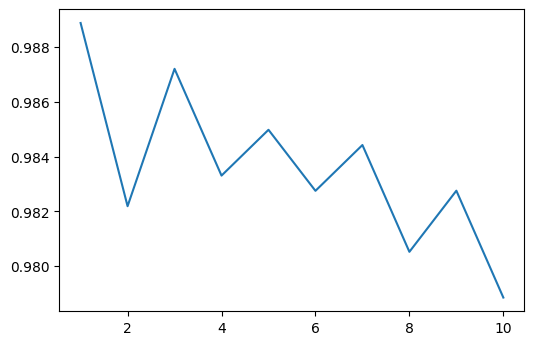

In [9]:
final_accu = { }
for i in range(1,11):
    mean = cross_validate(i)
    mean_accu = np.mean(mean)
    final_accu[i] = mean_accu
print(final_accu)
plt.plot(*zip(*final_accu.items()))
plt.show()

We achieved great accuracy with the KNN model but KNN K fold algorthim uses high memory ad as it is an algorthm and not a model it is hard to debug and explore.

In [10]:
from sklearn.neural_network import MLPClassifier
def train_mlp(k,train_features,train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = k)
    mlp.fit(train_features,train_labels)
    return mlp

In [11]:
def cross_validate_mlp(k):
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    accuracies = [ ]
    for train_index, test_index in kf.split(data):
        train_features,test_features = data.loc[train_index],data.loc[test_index]
        train_labels,test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_mlp(k,train_features,train_labels)
        accura = test(model,test_features,test_labels)
        accuracies.append(accura)
    return accuracies

In [12]:
# nn_accu = { }
# nn_one_neurons = [
#     (8,),
#     (16,),
#     (32,),
#     (64,),
#     (128,),
#     (256,)
# ]
# for nn in nn_one_neurons:
mean_nn_8 = cross_validate_mlp((8,),)
mean_accu_nn_8 = np.mean(mean_nn_8)
print(mean_accu_nn_8)
# nn_accu[nn] = mean_accu_nn
# print(nn_accu)
nn_accu = {}
nn_accu["8"] = mean_accu_nn_8

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.8925773323434794


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [13]:
mean_nn_16 = cross_validate_mlp((16,),)
mean_accu_nn_16 = np.mean(mean_nn_16)
print(mean_accu_nn_16)
nn_accu["16"] = mean_accu_nn_16

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.948802276664192


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [14]:
mean_nn_32 = cross_validate_mlp((32,),)
mean_accu_nn_32 = np.mean(mean_nn_32)
print(mean_accu_nn_32)
nn_accu["32"] = mean_accu_nn_32

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.9599443207126949


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [15]:
mean_nn_64 = cross_validate_mlp((64,),)
mean_accu_nn_64 = np.mean(mean_nn_64)
print(mean_accu_nn_64)
nn_accu["64"] = mean_accu_nn_64

0.9694011383320961


In [16]:
mean_nn_128 = cross_validate_mlp((128,),)
mean_accu_nn_128 = np.mean(mean_nn_128)
print(mean_accu_nn_128)
nn_accu["128"] = mean_accu_nn_128

0.9755233853006682


In [17]:
mean_nn_256 = cross_validate_mlp((256,),)
mean_accu_nn_256 = np.mean(mean_nn_256)
print(mean_accu_nn_256)
nn_accu["256"] = mean_accu_nn_256

0.9788604305864885


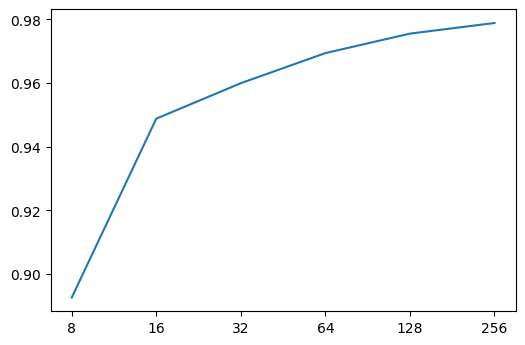

In [18]:
plt.plot(*zip(*nn_accu.items()))
plt.show()

Couldn't loop it as my Jupyter Notebook was running real slow for some reason, so I got all the values manually. 
I took a single hidden layer, we can see from the plot that as we increase number of neurons from 8,16,32,64,128,256 an increase in accuracy is visible.
But with that being said we achieved a better accuracy with the KNN model. 

It looks like adding more neurons to the single hidden layer improved simple accuracy to approximately 97%(**refer cell 24**).

Let us try increasing the number of layers to see if we achieve a better accuracy or near the KNN accuracy.

In [19]:
nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]
nn_two_accus = { }
for i in nn_two_neurons:
    acc_nn_two=cross_validate_mlp(i)
    mean_accu_two_nn = np.mean(acc_nn_two)
    nn_two_accus[i] = mean_accu_two_nn
print(nn_two_accus)  

{(64, 64): 0.9721752041573868, (128, 128): 0.9760789408562236, (256, 256): 0.9816419203167533}


Here we trained 3 different models with 2 Hidden layers with 4 fold cross validation:
1. 64 neurons in each of the 2 layers
2. 128 neurons in each of the 2 layers 
3. 256 neurons in each of the 2 layers

Using 2 hidden layers improved our simple accuracy to 98%. Using 4-fold cross validation also gives us a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

Now let us see if we achieve better accuracy or if we actually overfitting our model by using 6 fold validation

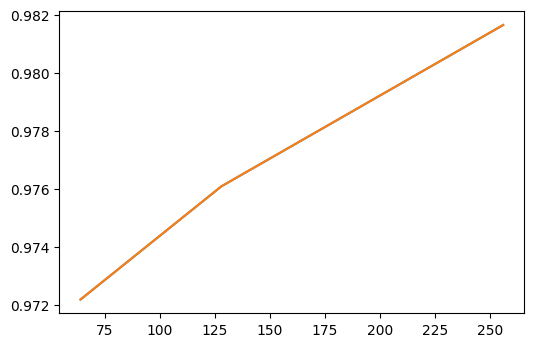

In [20]:
plt.plot(*zip(*nn_two_accus.items()))
plt.show()

Now let us try it with 3 hidden layers and with 6 fold cross validation 

In [21]:
def cross_validate_mlp_six(k):
    kf = KFold(n_splits = 6, random_state=2, shuffle=True)
    accuracies_6 = [ ]
    for train_index, test_index in kf.split(data):
        train_features,test_features = data.loc[train_index],data.loc[test_index]
        train_labels,test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_mlp(k,train_features,train_labels)
        accura_6 = test(model,test_features,test_labels)
        accuracies_6.append(accura_6)
    return accuracies_6


In [22]:
lay = [(10,10,10),(64,64,64),(128,128,128)]
three_accu_nn = { }
for l in lay:
    mean_nn_three = cross_validate_mlp_six(l)
    mean_accu_three = np.mean(mean_nn_three)
    three_accu_nn[l] = mean_accu_three
three_accu_nn

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

{(10, 10, 10): 0.9310033444816055,
 (64, 64, 64): 0.9710646599777034,
 (128, 128, 128): 0.9760832404310665}

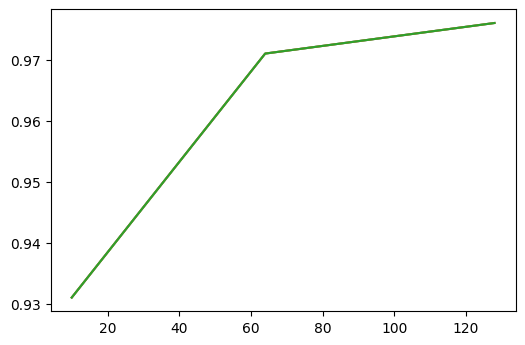

In [23]:
plt.plot(*zip(*three_accu_nn.items()))
plt.show()

Here we trained 3 different models with 3 Hidden layers with 6 fold cross validation:
1. 10 neurons in each of the 3 layers
2. 64 neurons in each of the 3 layers 
3. 128 neurons in each of the 3 layers

Models 2 and 3 returned an accuracy of around 98% similar to what we achieved in the previous cell where we used 2 Hidden layers with 4 fold cross validation. We weren't able to do better in terms of accuracy by increasing layers. So I don't believe our model is overfit

In [24]:
print(nn_accu)

{'8': 0.8925773323434794, '16': 0.948802276664192, '32': 0.9599443207126949, '64': 0.9694011383320961, '128': 0.9755233853006682, '256': 0.9788604305864885}


This is a single hidden layer with n(i.e **8,16,32,64,128,256**) different neurons, we see the values varying 

In [25]:
from sklearn.tree import DecisionTreeRegressor
def train_tree(k1,k2,train_features,train_labels):
    dec_model = DecisionTreeRegressor(random_state = 1,min_samples_leaf = k1,max_depth = k2)
    dec_model.fit(train_features,train_labels)
    return dec_model


In [26]:
def normal_tree(k1,k2):
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    index = int(len(data)*0.8)
    accuracies = [ ]
#     for train_index, test_index in kf.split(data):
#         train_features,test_features = data.loc[train_index],data.loc[test_index]
#         train_labels,test_labels = labels.loc[train_index], labels.loc[test_index]
    train_features = data.loc[:index]
    test_features = data.loc[index:]
    train_labels = labels.loc[:index]
    test_labels = labels.loc[index:]
    model = train_tree(k1,k2,train_features,train_labels)
    accura = test(model,test_features,test_labels)
    accuracies.append(accura)
    return accuracies


In [27]:
normal_tree(3,100)

[0.65]

In [28]:
def cross_validate_tree(k1,k2):
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    accuracies = [ ]
    for train_index, test_index in kf.split(data):
        train_features,test_features = data.loc[train_index],data.loc[test_index]
        train_labels,test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_tree(k1,k2,train_features,train_labels)
        accura = test(model,test_features,test_labels)
        accuracies.append(accura)
    return accuracies

In [29]:
cross_validate_tree(3,50)

[0.6888888888888889, 0.688195991091314, 0.732739420935412, 0.6815144766146993]

Decision Tree model yields lower accuracy in comparison to the previously used models/ algorithms. We tried both train/test split and cross validation but the highest accuracy we achieved is 73% which isn't desirable. 

We achieved a good accuracy of approximately 98% with Neural Network with 1,2 and 3 Hidden layers.

Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.
Given that k-nearest neighbors achieved approximately 98% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.